In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
from pandas_datareader import data


In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [7]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
end
start

datetime.datetime(2021, 7, 3, 0, 0)

In [8]:
for stock in tech_list:
  globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [9]:
AAPL.describe()


,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,157.955437,154.249484,156.022183,156.165357,8.988892e+07,155.755664
std,12.837571,12.485090,12.724953,12.666876,2.661425e+07,12.684164
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.769997,145.232498,146.197498,146.147495,7.108850e+07,145.553795
50%,154.675003,150.510002,152.235001,152.284996,8.638955e+07,151.900696
75%,169.727493,165.512501,167.607498,166.727497,1.045706e+08,166.482895
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-07-02 to 2022-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

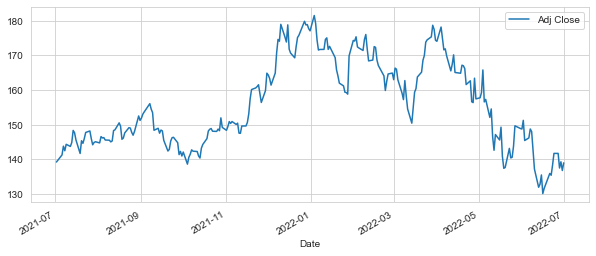

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


<AxesSubplot:xlabel='Date'>

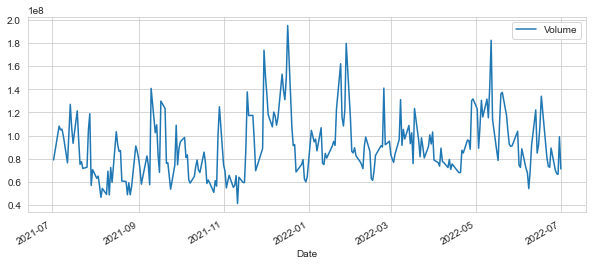

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
   

<AxesSubplot:xlabel='Date'>

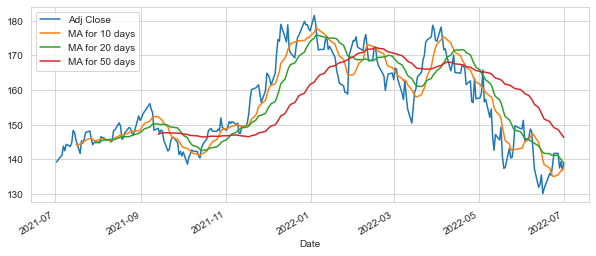

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

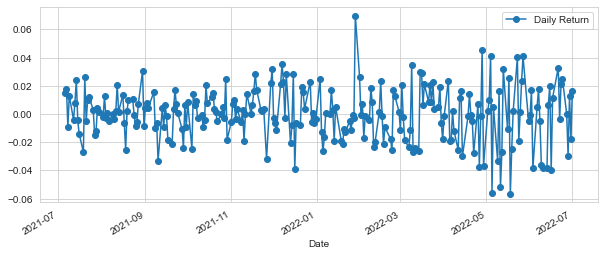

In [15]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='-',marker='o')

C:\Users\abala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

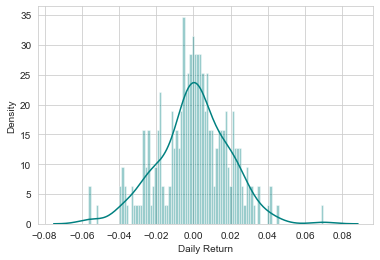

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='teal')

<AxesSubplot:>

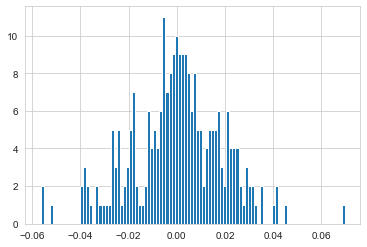

In [17]:
AAPL['Daily Return'].hist(bins=100)

In [18]:
from pandas_datareader.data import DataReader
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [19]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-02,139.164932,2574.379883,275.401215,175.548996
2021-07-06,141.213226,2595.419922,275.411133,183.787003
2021-07-07,143.748718,2601.550049,277.662689,184.828995
2021-07-08,142.426285,2583.540039,275.173065,186.570496
2021-07-09,144.285675,2591.489990,275.688873,185.966995
...,...,...,...,...
2022-06-27,141.660004,2332.449951,264.890015,113.220001
2022-06-28,137.440002,2251.429932,256.480011,107.400002
2022-06-29,139.229996,2245.129883,260.260010,108.919998


In [20]:
tech_rets=closing_df.pct_change()
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-02,NaN,NaN,NaN,NaN
2021-07-06,0.014718,0.008173,0.000036,0.046927
2021-07-07,0.017955,0.002362,0.008175,0.005670
2021-07-08,-0.009200,-0.006923,-0.008966,0.009422
2021-07-09,0.013055,0.003077,0.001874,-0.003235
...,...,...,...,...
2022-06-27,0.000000,-0.016159,-0.010497,-0.027821
2022-06-28,-0.029790,-0.034736,-0.031749,-0.051404
2022-06-29,0.013024,-0.002798,0.014738,0.014153


C:\Users\abala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


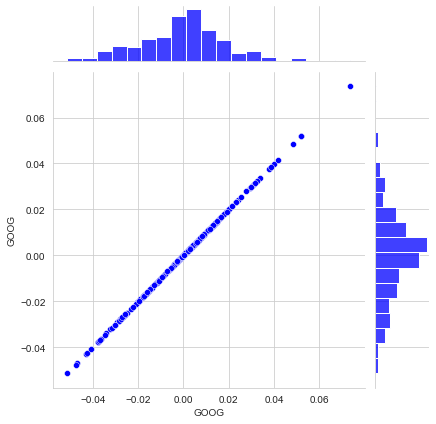

In [21]:
sns.jointplot('GOOG','GOOG',tech_rets,color='blue',kind='scatter')

C:\Users\abala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


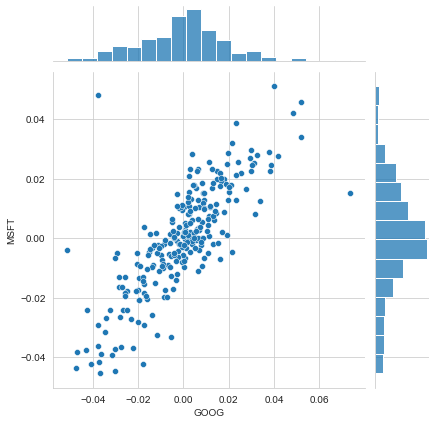

In [22]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',legend=True)

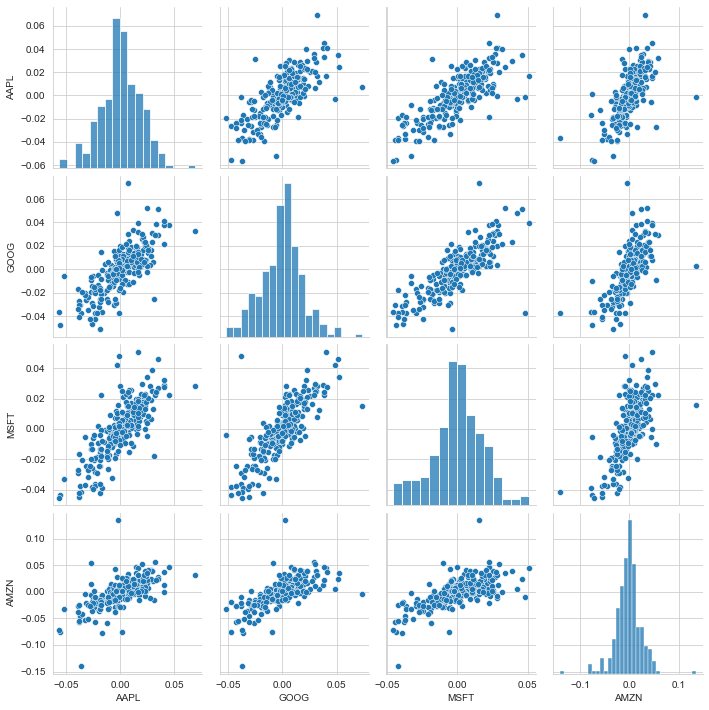

In [23]:
sns.pairplot(tech_rets.dropna())

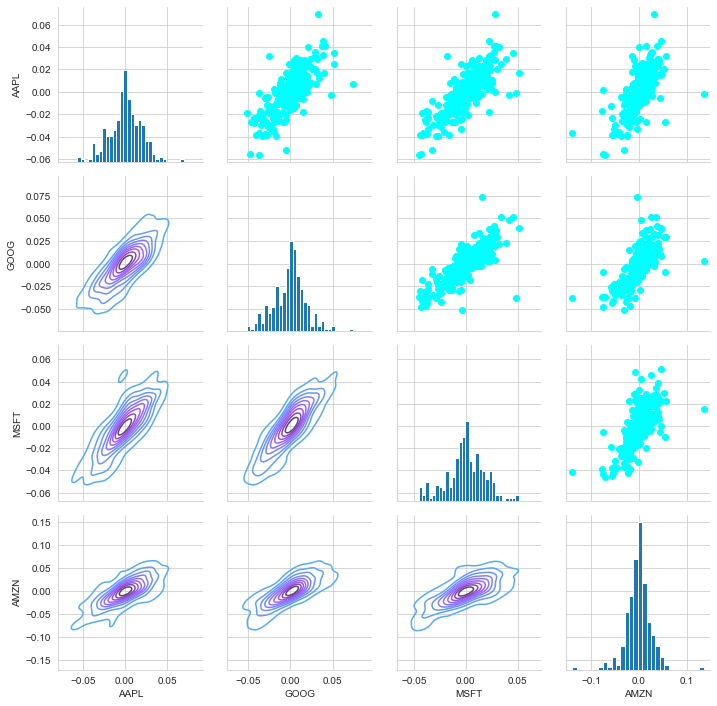

In [24]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='cyan')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


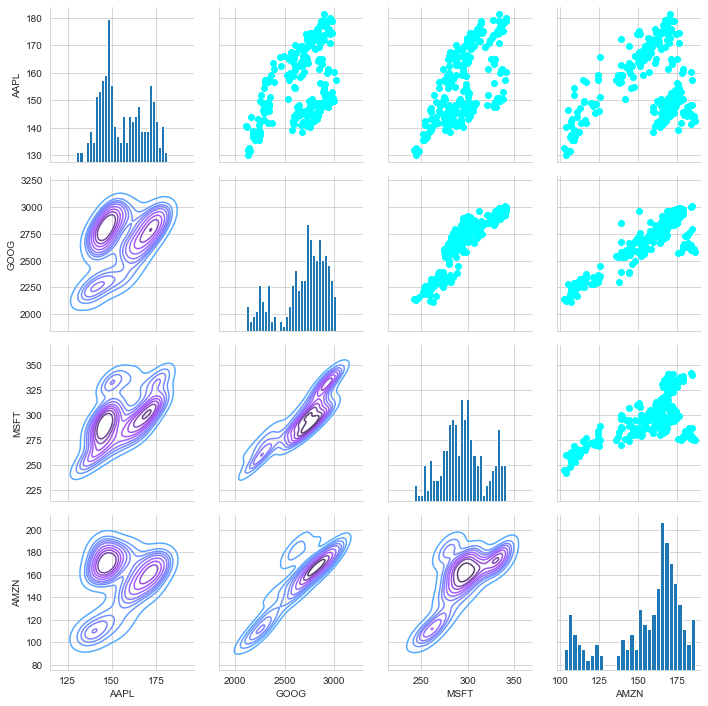

In [25]:
returns_fig=sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='cyan')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

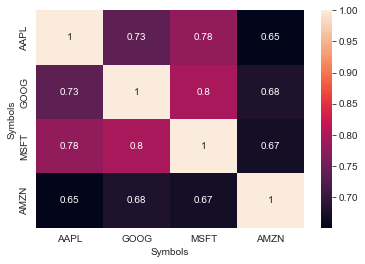

In [26]:
sns.heatmap(tech_rets.dropna().corr(), annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

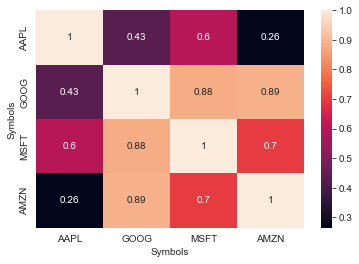

In [27]:
sns.heatmap(closing_df.corr(), annot=True)

In [28]:
rets=tech_rets.dropna()

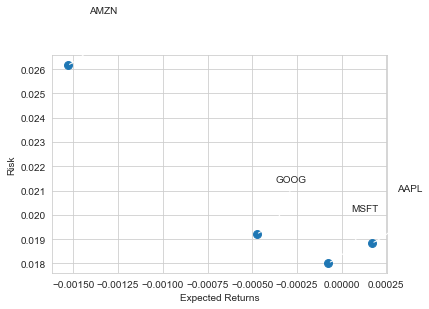

In [30]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Returns")
plt.ylabel("Risk")
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))